Devoir de maison Machine learning  
groupe: Bekda Lilia, Boukhemis Imene, Boucherrab Meziane
-----------------------------------------------------------------------------

Exercice 1
------------------------------

# Phase de traitemet des données 

In [3]:
#Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
#Chargement des données 
listeVar=['MATRIC','DEPTS','PVS','SEXEQ','AGER','FAMIQ', 
 'RELAT','PCSPQ','QUALS','G03G04S','G25G26S', 
 'G29G30S','G35G36S','G37G38S','G45G46S','G47G48S',
 'IMPNBS','REJETS','OPGNB','MOYRV','TAVEP','ENDET','GAGET',
 'GAGEC','GAGEM','KVUNB','QSMOY','QCRED','DMVTP','BOPPN',
 'FACAN','LGAGT','VIENB','VIEMT','UEMNB','UEMMTS','XLGNB',
 'XLGMT','YLVNB','YLVMT','NBELTS','MTELTS','NBCATS','MTCATS',
 'NBBECS','MTBECS','ZOCNB','NTCAS','NPTAG','SEGV2S','ITAVC',
 'HAVEF','JNBJD1S','JNBJD2S','JNBJD3S','CARVP']
path=""
Data = pd.read_table(path+'visa_raw.dat',
                        sep=';',header=None, index_col=0, names=listeVar)

In [5]:
Data.head()

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
131842,31,03,1,67,M,406,755,A,inc,inc,...,0,2,0,5,947984,614107,0,0,1,oui
140210,31,01,1,82,M,445,770,A,inc,inc,...,33,2,0,5,3368558,2569775,3,3,5,oui
148009,31,01,1,51,M,238,311,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,oui
442153,82,06,1,52,M,270,465,A,inc,inc,...,5,2,0,5,19856243,133896,0,0,0,oui
552427,97,01,1,58,M,139,345,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,oui


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 131842 to 7589439
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DEPTS    1417 non-null   object
 1   PVS      1417 non-null   object
 2   SEXEQ    1417 non-null   object
 3   AGER     1417 non-null   object
 4   FAMIQ    1417 non-null   object
 5   RELAT    1417 non-null   object
 6   PCSPQ    1417 non-null   object
 7   QUALS    1417 non-null   object
 8   G03G04S  1417 non-null   object
 9   G25G26S  1417 non-null   object
 10  G29G30S  1417 non-null   object
 11  G35G36S  1417 non-null   object
 12  G37G38S  1417 non-null   object
 13  G45G46S  1417 non-null   object
 14  G47G48S  1417 non-null   object
 15  IMPNBS   1417 non-null   object
 16  REJETS   1417 non-null   object
 17  OPGNB    1417 non-null   object
 18  MOYRV    1417 non-null   object
 19  TAVEP    1417 non-null   object
 20  ENDET    1417 non-null   object
 21  GAGET    1417 non-null   object
 2

In [7]:
Data.shape

(1417, 55)

Les Jeux de donnée represente les donnée d'un echantillon de données obtenue a partire de sandage qui represente les données de 1417 individus,on remarque que les variables pour chaque individus contiennent des valeur numeriique mais aussi des valeur en chaine de caractére on va tut d'abore essayer de voir si les données sont plus au moin complétes ou pas

In [8]:
Data.isna().sum()
Data.isnull().sum()

DEPTS      0
PVS        0
SEXEQ      0
AGER       0
FAMIQ      0
RELAT      0
PCSPQ      0
QUALS      0
G03G04S    0
G25G26S    0
G29G30S    0
G35G36S    0
G37G38S    0
G45G46S    0
G47G48S    0
IMPNBS     0
REJETS     0
OPGNB      0
MOYRV      0
TAVEP      0
ENDET      0
GAGET      0
GAGEC      0
GAGEM      0
KVUNB      0
QSMOY      0
QCRED      0
DMVTP      0
BOPPN      0
FACAN      0
LGAGT      0
VIENB      0
VIEMT      0
UEMNB      0
UEMMTS     0
XLGNB      0
XLGMT      0
YLVNB      0
YLVMT      0
NBELTS     0
MTELTS     0
NBCATS     0
MTCATS     0
NBBECS     0
MTBECS     0
ZOCNB      0
NTCAS      0
NPTAG      0
SEGV2S     0
ITAVC      0
HAVEF      0
JNBJD1S    0
JNBJD2S    0
JNBJD3S    0
CARVP      0
dtype: int64

Les données sont complétes

In [9]:
Data.describe()

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
count,1417,1417,1417,1417,1417,1417,1417,1417,1417,1417,...,1417,1417,1417,1417,1417,1417,1417,1417,1417,1417
unique,37,8,3,96,7,383,124,7,3,4,...,58,7,5,8,1261,355,42,38,40,2
top,31,01,1,47,M,.,800,B,inc,inc,...,.,1,0,6,0,0,0,0,0,non
freq,896,902,841,38,699,29,110,349,1408,1304,...,503,610,1216,319,94,940,1002,981,981,999


### on va maintenant transformer les données en binaires

de tel sorte que on assigne 
cel : pour celibataire 
Div : divorcé
M : marrier

et 
1 pour homme et 2 pour femme
puis assigner une notation pour chaque cathégori socio-proffessionel des individus 


In [10]:
def create_categorical_data(df,column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name],ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [11]:
#FAMIQ
cat_name_dic = {'C':'Fcel','D':'Fdiv','M':'Fmar','S':'Fsep','U':'Fuli','V':'Fveu','inc':'Finc'}
Data["FAMIQ"]=create_categorical_data(Data,"FAMIQ", cat_name_dic)
#SEXEQ
cat_name_dic = {'1':'Shom','2':'Sfem','inc':'Sinc'}
Data["SEXEQ"]=create_categorical_data(Data,"SEXEQ", cat_name_dic)
#CARVP
cat_name_dic = {'non':'Cnon','oui':'Coui'}
Data["CARVP"]=create_categorical_data(Data,"CARVP", cat_name_dic)
#PCSPQ
Data["PCSPQ"] = Data["PCSPQ"].str.get(0).replace("0","i")
cat_name_dic = {'1':'Pagr', '2':'Part', '3':'Pcad', '4':'Pint', '5':'Pemp','6':'Pouv',
                '7':'Pret', '8':'Psan', 'i':'Pinc'}
Data["PCSPQ"]=create_categorical_data(Data,"PCSPQ", cat_name_dic)

In [12]:
Data

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
131842,31,03,Shom,67,Fmar,406,Pret,A,inc,inc,...,0,2,0,5,947984,614107,0,0,1,Coui
140210,31,01,Shom,82,Fmar,445,Pret,A,inc,inc,...,33,2,0,5,3368558,2569775,3,3,5,Coui
148009,31,01,Shom,51,Fmar,238,Pcad,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,Coui
442153,82,06,Shom,52,Fmar,270,Pint,A,inc,inc,...,5,2,0,5,19856243,133896,0,0,0,Coui
552427,97,01,Shom,58,Fmar,139,Pcad,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,Coui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572458,31,01,Sfem,43,Fmar,27,Pcad,inc,inc,inc,...,.,0,0,2,10685,0,0,0,0,Cnon
7574479,32,01,Sfem,49,Fmar,31,Pemp,B,inc,inc,...,9,1,0,5,63336,0,5,2,2,Cnon
7580358,65,03,Sfem,27,Finc,192,Psan,D,inc,inc,...,2,1,0,6,27897,0,11,14,13,Cnon


In [13]:
mapping_dict = {'Coui': 1, 'Cnon': 0}
Data['CARVP'] = Data['CARVP'].replace(mapping_dict)

In [14]:
Data = Data[Data.NBCATS!= "1"]
Data = Data[Data.NBBECS!= "1"]

Data= Data[np.logical_not(Data.G29G30S.isin(['B','X']))] 
Data= Data[np.logical_not(Data.G03G04S.isin(['B','X']))] 
Data= Data[np.logical_not(Data.G45G46S.isin(['A','B','X']))] 
Data= Data[np.logical_not(Data.G37G38S.isin(['A']))] 
Data= Data[np.logical_not(Data.G25G26S.isin(['A','B','X']))] 
Data= Data[np.logical_not(Data.G47G48S.isin(['B']))] 




In [15]:
Data

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
131842,31,03,Shom,67,Fmar,406,Pret,A,inc,inc,...,0,2,0,5,947984,614107,0,0,1,1
140210,31,01,Shom,82,Fmar,445,Pret,A,inc,inc,...,33,2,0,5,3368558,2569775,3,3,5,1
148009,31,01,Shom,51,Fmar,238,Pcad,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,1
552427,97,01,Shom,58,Fmar,139,Pcad,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,1
556005,40,01,Shom,27,Fcel,99,Psan,B,inc,inc,...,14,2,0,5,83224,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567726,31,01,Sfem,38,Fmar,23,Psan,inc,inc,inc,...,.,0,0,1,0,0,0,0,0,0
7572458,31,01,Sfem,43,Fmar,27,Pcad,inc,inc,inc,...,.,0,0,2,10685,0,0,0,0,0
7574479,32,01,Sfem,49,Fmar,31,Pemp,B,inc,inc,...,9,1,0,5,63336,0,5,2,2,0


In [16]:
Data = Data[Data.AGER!='.']
Data["AGER"]=Data["AGER"].astype(int)
Data=Data[np.logical_and(Data["AGER"]<66,Data["AGER"]>17)]

In [18]:
Data

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
148009,31,01,Shom,51,Fmar,238,Pcad,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,1
552427,97,01,Shom,58,Fmar,139,Pcad,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,1
556005,40,01,Shom,27,Fcel,99,Psan,B,inc,inc,...,14,2,0,5,83224,0,0,0,0,1
556686,65,01,Shom,49,Fsep,89,Pemp,A,inc,inc,...,11,3,1,4,494773,21423,2,1,12,1
642680,65,01,Shom,64,Fmar,216,Pcad,A,inc,inc,...,27,1,0,5,81218,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567726,31,01,Sfem,38,Fmar,23,Psan,inc,inc,inc,...,.,0,0,1,0,0,0,0,0,0
7572458,31,01,Sfem,43,Fmar,27,Pcad,inc,inc,inc,...,.,0,0,2,10685,0,0,0,0,0
7574479,32,01,Sfem,49,Fmar,31,Pemp,B,inc,inc,...,9,1,0,5,63336,0,5,2,2,0


In [19]:
mapping_dict2 = {'Shom': 1, 'Sfem': 2 ,'Sinc': 0}
Data['SEXEQ'] = Data['SEXEQ'].replace(mapping_dict2)

In [20]:
Data


,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
148009,31,01,1,51,Fmar,238,Pcad,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,1
552427,97,01,1,58,Fmar,139,Pcad,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,1
556005,40,01,1,27,Fcel,99,Psan,B,inc,inc,...,14,2,0,5,83224,0,0,0,0,1
556686,65,01,1,49,Fsep,89,Pemp,A,inc,inc,...,11,3,1,4,494773,21423,2,1,12,1
642680,65,01,1,64,Fmar,216,Pcad,A,inc,inc,...,27,1,0,5,81218,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567726,31,01,2,38,Fmar,23,Psan,inc,inc,inc,...,.,0,0,1,0,0,0,0,0,0
7572458,31,01,2,43,Fmar,27,Pcad,inc,inc,inc,...,.,0,0,2,10685,0,0,0,0,0
7574479,32,01,2,49,Fmar,31,Pemp,B,inc,inc,...,9,1,0,5,63336,0,5,2,2,0


In [21]:
listeVarSup=["DEPTS","QUALS","G03G04S","G25G26S","G29G30S","G35G36S",
            "G37G38S","G45G46S","G47G48S","SEGV2S","PVS","JNBJD1S","JNBJD2S","JNBJD3S"]
Data.drop(listeVarSup,inplace=True,axis=1)

In [22]:
listeVar = [x for x in listeVar if x not in listeVarSup]

In [23]:
Data.TAVEP

MATRIC
148009     701939
552427       3402
556005      76321
556686     473350
642680      78462
            ...  
7567726         0
7572458     10685
7574479     55845
7580358     24642
7589439      8785
Name: TAVEP, Length: 1069, dtype: object

### Verifier si il y'a ds caractére specieau et les rendre NA si oui 

In [24]:
Data = Data.applymap(str)

# Créer un masque booléen où chaque cellule contient True si elle ne contient pas de caractère spécial, sinon False
mask = Data.applymap(lambda x: not any(char in str(x) for char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))

Data[mask == False] = np.nan
Data.dropna(inplace=True)
Data.reset_index(drop=True, inplace=True)

In [25]:
Data

,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,IMPNBS,REJETS,OPGNB,MOYRV,TAVEP,...,NBCATS,MTCATS,NBBECS,MTBECS,ZOCNB,NTCAS,NPTAG,ITAVC,HAVEF,CARVP
0,1,51,Fmar,238,Pcad,0,0,0,115,701939,...,0,0,0,0,14,2,0,1303700,556967,1
1,1,58,Fmar,139,Pcad,0,0,0,40,3402,...,0,0,0,0,0,1,0,122745,0,1
2,1,27,Fcel,99,Psan,0,0,0,17,76321,...,0,0,0,0,14,2,0,83224,0,1
3,1,49,Fsep,89,Pemp,0,0,0,374,473350,...,0,0,0,0,11,3,1,494773,21423,1
4,1,64,Fmar,216,Pcad,0,0,5,24,78462,...,0,0,0,0,27,1,0,81218,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,30,Fmar,36,Pouv,0,0,1,12,57096,...,0,0,0,0,22,1,0,60462,0,0
692,2,45,Fmar,15,Pcad,0,0,0,7,0,...,0,0,0,0,4,1,0,4134,0,0
693,2,43,Fdiv,39,Pemp,0,0,2,24,293310,...,0,0,0,0,2,1,0,312066,0,0
694,2,49,Fmar,31,Pemp,0,0,4,14,55845,...,0,0,0,0,9,1,0,63336,0,0


### Convertire tout les valeur en numeric si possible

In [26]:
Data = Data.apply(lambda col: pd.to_numeric(col, errors='coerce') if pd.api.types.is_numeric_dtype(col) else col)
Data.drop_duplicates(inplace=True)


In [27]:
Data

,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,IMPNBS,REJETS,OPGNB,MOYRV,TAVEP,...,NBCATS,MTCATS,NBBECS,MTBECS,ZOCNB,NTCAS,NPTAG,ITAVC,HAVEF,CARVP
0,1,51,Fmar,238,Pcad,0,0,0,115,701939,...,0,0,0,0,14,2,0,1303700,556967,1
1,1,58,Fmar,139,Pcad,0,0,0,40,3402,...,0,0,0,0,0,1,0,122745,0,1
2,1,27,Fcel,99,Psan,0,0,0,17,76321,...,0,0,0,0,14,2,0,83224,0,1
3,1,49,Fsep,89,Pemp,0,0,0,374,473350,...,0,0,0,0,11,3,1,494773,21423,1
4,1,64,Fmar,216,Pcad,0,0,5,24,78462,...,0,0,0,0,27,1,0,81218,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,30,Fmar,36,Pouv,0,0,1,12,57096,...,0,0,0,0,22,1,0,60462,0,0
692,2,45,Fmar,15,Pcad,0,0,0,7,0,...,0,0,0,0,4,1,0,4134,0,0
693,2,43,Fdiv,39,Pemp,0,0,2,24,293310,...,0,0,0,0,2,1,0,312066,0,0
694,2,49,Fmar,31,Pemp,0,0,4,14,55845,...,0,0,0,0,9,1,0,63336,0,0


In [28]:
Data = Data.applymap(str)

print(Data.dtypes)


SEXEQ     object
AGER      object
FAMIQ     object
RELAT     object
PCSPQ     object
IMPNBS    object
REJETS    object
OPGNB     object
MOYRV     object
TAVEP     object
ENDET     object
GAGET     object
GAGEC     object
GAGEM     object
KVUNB     object
QSMOY     object
QCRED     object
DMVTP     object
BOPPN     object
FACAN     object
LGAGT     object
VIENB     object
VIEMT     object
UEMNB     object
UEMMTS    object
XLGNB     object
XLGMT     object
YLVNB     object
YLVMT     object
NBELTS    object
MTELTS    object
NBCATS    object
MTCATS    object
NBBECS    object
MTBECS    object
ZOCNB     object
NTCAS     object
NPTAG     object
ITAVC     object
HAVEF     object
CARVP     object
dtype: object


#### On remarque que plusieur données sont en objet alors qu'elle sont numerique on doit ls transformer

In [29]:
for column in Data.columns:
    try:
        Data[column] = pd.to_numeric(Data[column])
    except ValueError:
        pass 

In [30]:
print(Data.dtypes)

SEXEQ      int64
AGER       int64
FAMIQ     object
RELAT      int64
PCSPQ     object
IMPNBS     int64
REJETS     int64
OPGNB      int64
MOYRV      int64
TAVEP      int64
ENDET      int64
GAGET      int64
GAGEC      int64
GAGEM      int64
KVUNB      int64
QSMOY      int64
QCRED      int64
DMVTP      int64
BOPPN      int64
FACAN      int64
LGAGT      int64
VIENB      int64
VIEMT      int64
UEMNB      int64
UEMMTS     int64
XLGNB      int64
XLGMT      int64
YLVNB      int64
YLVMT      int64
NBELTS     int64
MTELTS     int64
NBCATS     int64
MTCATS     int64
NBBECS     int64
MTBECS     int64
ZOCNB      int64
NTCAS      int64
NPTAG      int64
ITAVC      int64
HAVEF      int64
CARVP      int64
dtype: object


### Maintenant qu'on as des données un peut meilleur on peut commencer par les explorer un peut

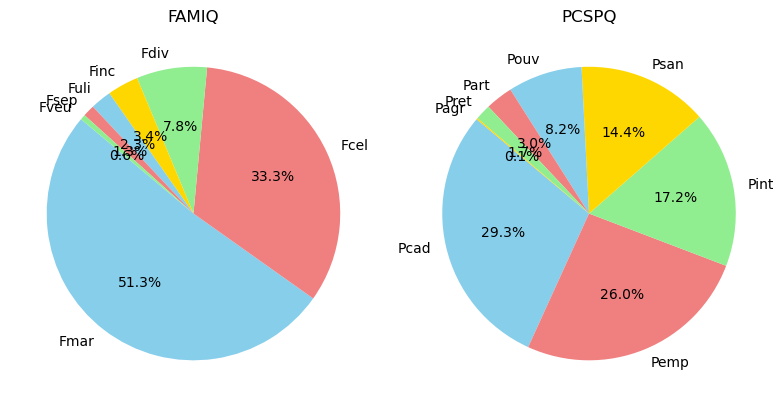

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

axes[0].pie(Data['FAMIQ'].value_counts(), labels=Data['FAMIQ'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0].set_title('FAMIQ')

axes[1].pie(Data['PCSPQ'].value_counts(), labels=Data['PCSPQ'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1].set_title('PCSPQ')

plt.tight_layout()


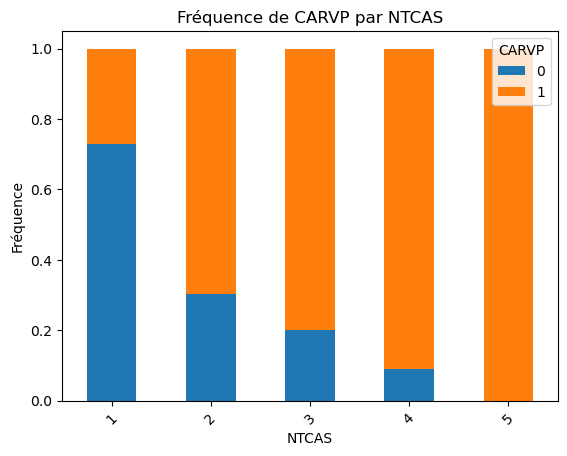

In [34]:
variable_choisie = "NTCAS"

groupes = Data.groupby(variable_choisie)['CARVP'].value_counts(normalize=True).unstack()
groupes.plot(kind='bar', stacked=True)
plt.title(f'Fréquence de CARVP par {variable_choisie}')
plt.xlabel(variable_choisie)
plt.ylabel('Fréquence')
plt.legend(title='CARVP')
plt.xticks(rotation=45)
plt.show()

# Régression logistiaue

In [36]:
Data.head()

,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,IMPNBS,REJETS,OPGNB,MOYRV,TAVEP,...,NBCATS,MTCATS,NBBECS,MTBECS,ZOCNB,NTCAS,NPTAG,ITAVC,HAVEF,CARVP
0,1,51,Fmar,238,Pcad,0,0,0,115,701939,...,0,0,0,0,14,2,0,1303700,556967,1
1,1,58,Fmar,139,Pcad,0,0,0,40,3402,...,0,0,0,0,0,1,0,122745,0,1
2,1,27,Fcel,99,Psan,0,0,0,17,76321,...,0,0,0,0,14,2,0,83224,0,1
3,1,49,Fsep,89,Pemp,0,0,0,374,473350,...,0,0,0,0,11,3,1,494773,21423,1
4,1,64,Fmar,216,Pcad,0,0,5,24,78462,...,0,0,0,0,27,1,0,81218,0,1


In [37]:
print(Data.dtypes)

SEXEQ      int64
AGER       int64
FAMIQ     object
RELAT      int64
PCSPQ     object
IMPNBS     int64
REJETS     int64
OPGNB      int64
MOYRV      int64
TAVEP      int64
ENDET      int64
GAGET      int64
GAGEC      int64
GAGEM      int64
KVUNB      int64
QSMOY      int64
QCRED      int64
DMVTP      int64
BOPPN      int64
FACAN      int64
LGAGT      int64
VIENB      int64
VIEMT      int64
UEMNB      int64
UEMMTS     int64
XLGNB      int64
XLGMT      int64
YLVNB      int64
YLVMT      int64
NBELTS     int64
MTELTS     int64
NBCATS     int64
MTCATS     int64
NBBECS     int64
MTBECS     int64
ZOCNB      int64
NTCAS      int64
NPTAG      int64
ITAVC      int64
HAVEF      int64
CARVP      int64
dtype: object


In [178]:
X = Data.drop(columns=['CARVP'])
y = Data['CARVP']
print(X_df.head())

X_df = pd.DataFrame(X, columns=['AGER', 'RELAT', 'MOYRV', 'NTCAS','ENDET','VIENB','GAGEC',"FACAN","MTELTS","ZOCNB","NPTAG"])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)

X_df = pd.DataFrame(X_df)

   AGER  RELAT  MOYRV  NTCAS  ENDET  VIENB  GAGEC   FACAN  MTELTS  ZOCNB  \
0    51    238    115      2      4      1      0  206016       0     14   
1    58    139     40      1      0      0      0    3394       0      0   
2    27     99     17      2      0      0      0       0       0     14   
3    49     89    374      3      0      1  37859       0       0     11   
4    64    216     24      1      0      0      0       0   33839     27   

   NPTAG  
0      0  
1      0  
2      0  
3      1  
4      0  


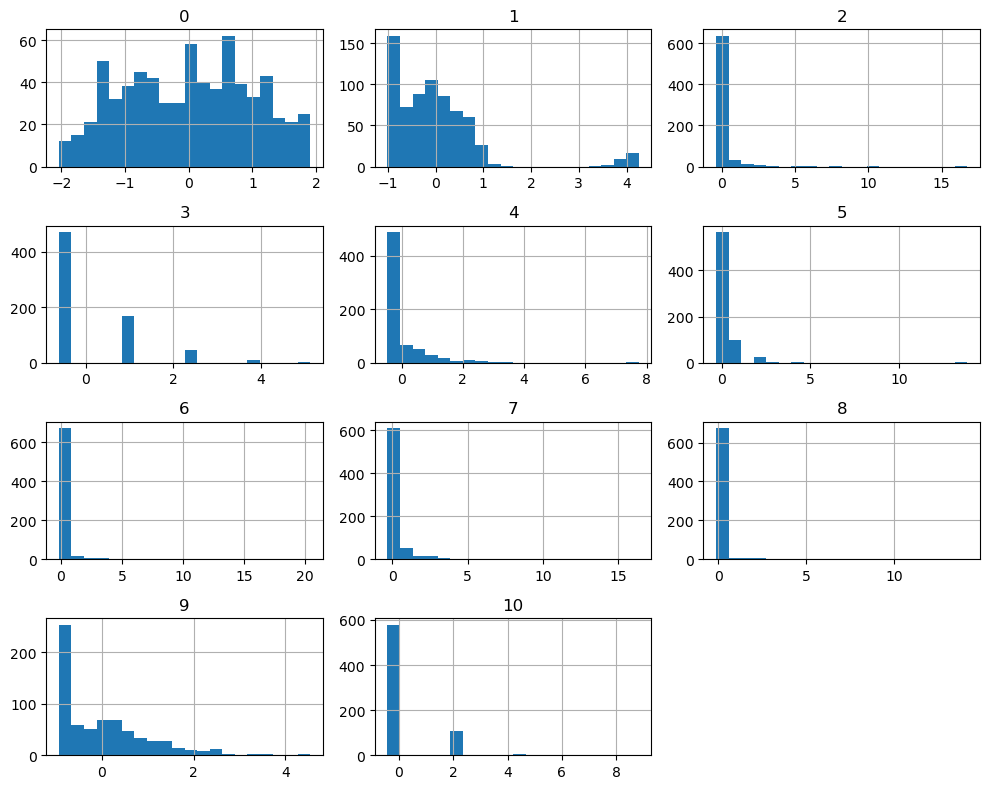

In [179]:
X_df.hist(figsize=(10, 8),bins=20)
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()

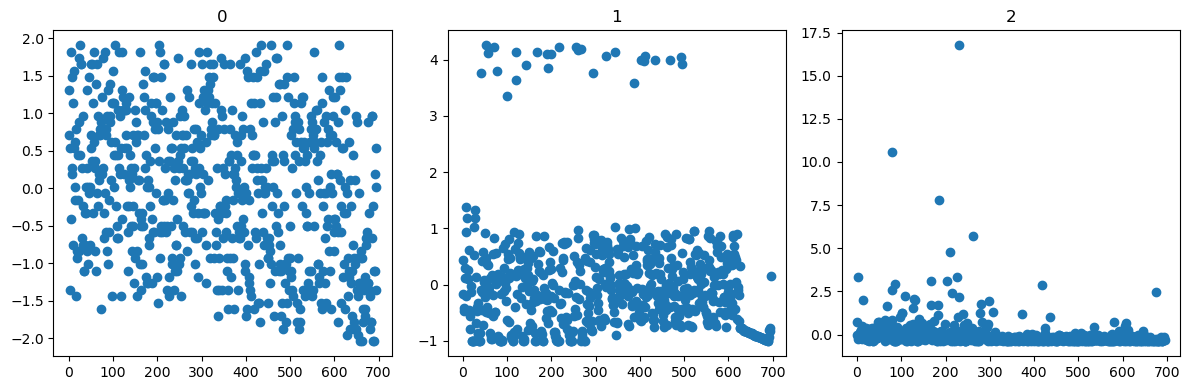

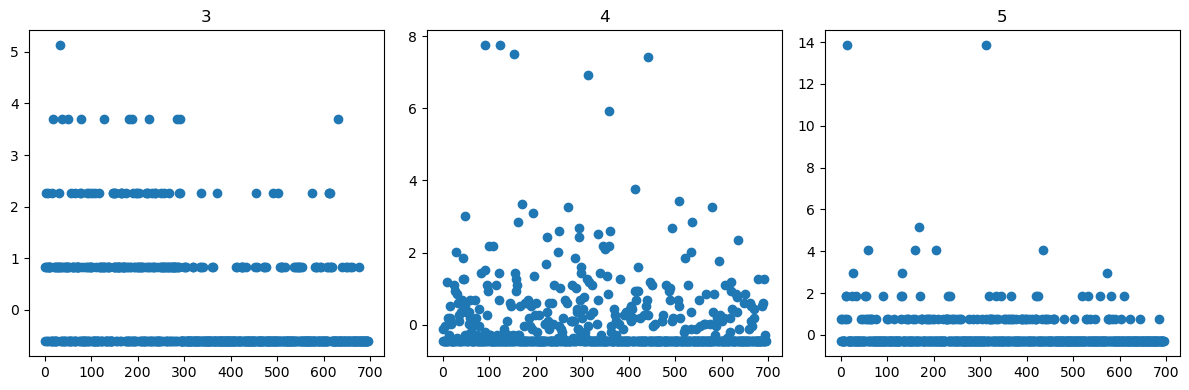

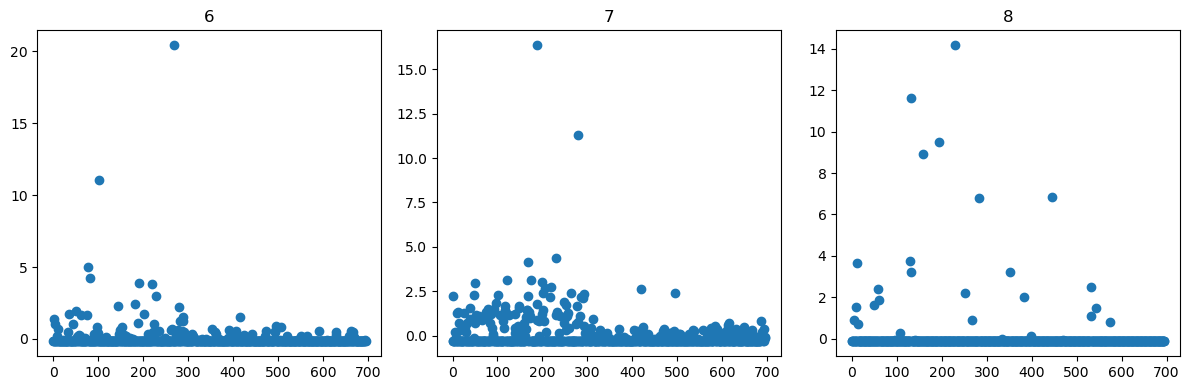

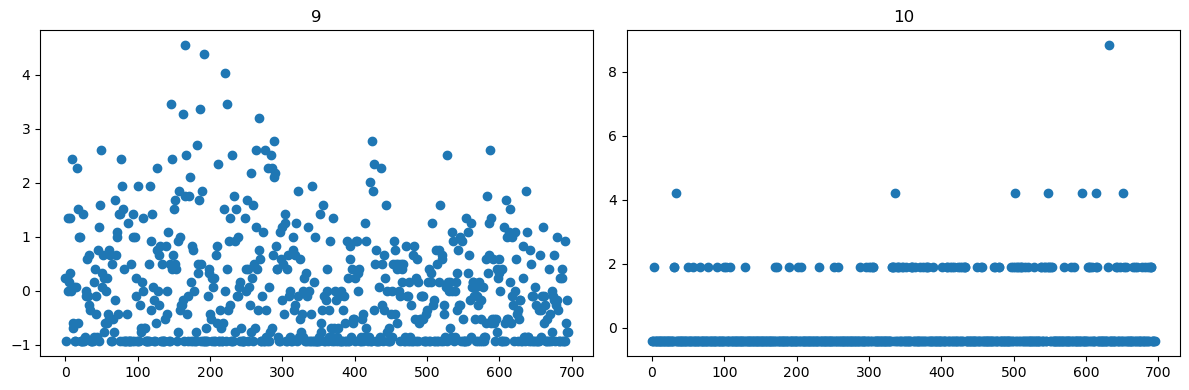

In [180]:
num_plots = len(X_df.columns)
for i in range(0, num_plots, 3):
    fig, axs = plt.subplots(nrows=1, ncols=min(3, num_plots - i), figsize=(12, 4))
    for j, col in enumerate(X_df.columns[i:i+3]):
        axs[j].scatter(range(len(X_df)), X_df[col])
        axs[j].set_title(col)
    plt.tight_layout()
    plt.show()

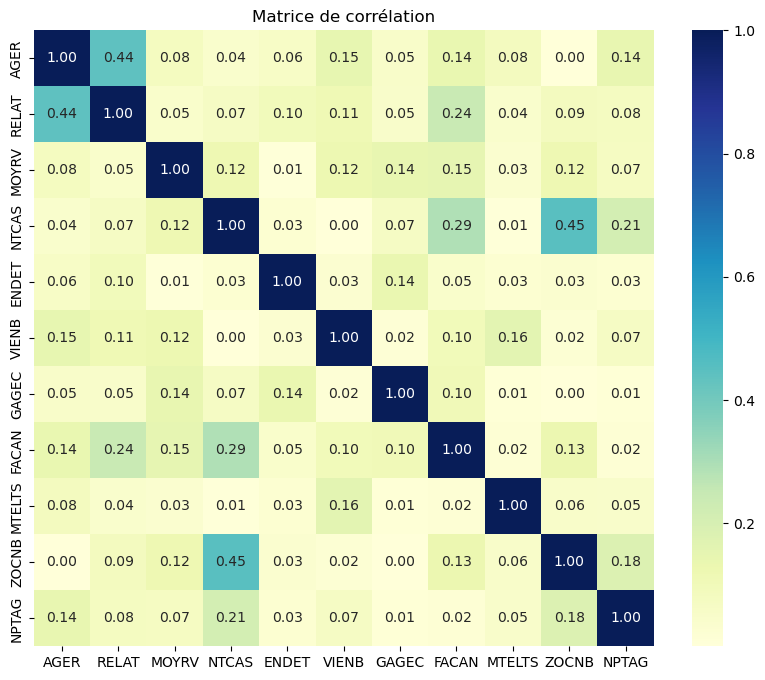

In [162]:
corr_matrix = X_df.corr()

#print("Matrice de corrélation :\n", corr_matrix.abs())

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.abs(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

### Régression Logistique

In [198]:
X_app , X_test, y_app, y_test = train_test_split(X_df, y, test_size=0.2, random_state = 1997)
Log_Model = LogisticRegression(solver='saga', max_iter=1000)
Log_Model.fit(X_app,y_app)

y_pred = Log_Model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.58      0.64        86
           1       0.49      0.63      0.55        54

    accuracy                           0.60       140
   macro avg       0.60      0.61      0.59       140
weighted avg       0.63      0.60      0.61       140



C:\Users\mezia\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


On remarque ici que pour la precision du modéle les valeurs prédites pour 0 sont correct a hauteur de 81% et a hauteur de 71 pourcent pour 1,
le f1-score qui est une des mesure d'evaluation de modéle en classification qu'on as defini en haut vaut 0.85 pour 0 et 0.62 pour 1 se qui est acceptable dans le se cas car on est pas sur le modéle le plus robuste.

In [199]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[50 36]
 [20 34]]


In [200]:
accuracy_LR = Log_Model.score(X_test, y_test)

print("Exactitude du modèle :", accuracy_LR)
model2.fit(X_train_RN, y_train_RN)

y_pred_RN = model2.predict(X_test_RN)

accuracy_RN = accuracy_score(y_test_RN, y_pred_RN)
conf_matrix_RN = confusion_matrix(y_test_RN, y_pred_RN)

print("Matrice de confusion (Réseau de Neurones) :\n", conf_matrix_RN)
print("Exactitude du modèle Réseau de Neurones :", accuracy_RN)


Exactitude du modèle : 0.6
Matrice de confusion (Réseau de Neurones) :
 [[68 18]
 [ 7 47]]
Exactitude du modèle Réseau de Neurones : 0.8214285714285714


C:\Users\mezia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [189]:
X_df = pd.DataFrame(X, columns=['AGER', 'RELAT', 'MOYRV', 'NTCAS','ENDET','VIENB','GAGEC',"FACAN","MTELTS","ZOCNB","NPTAG"])

coefficients = Log_Model.coef_

coefficients_df = pd.DataFrame(coefficients, columns=X_df.columns)
print(coefficients_df)

       AGER     RELAT     MOYRV    NTCAS     ENDET    VIENB     GAGEC  \
0  0.297566 -0.420273  1.359474  1.63733 -0.006527 -0.11882  0.678617   

      FACAN    MTELTS     ZOCNB     NPTAG  
0  0.895687  0.213022 -0.557985 -1.211739  


In [190]:
X_df

,AGER,RELAT,MOYRV,NTCAS,ENDET,VIENB,GAGEC,FACAN,MTELTS,ZOCNB,NPTAG
0,51,238,115,2,4,1,0,206016,0,14,0
1,58,139,40,1,0,0,0,3394,0,0,0
2,27,99,17,2,0,0,0,0,0,14,0
3,49,89,374,3,0,1,37859,0,0,11,1
4,64,216,24,1,0,0,0,0,33839,27,0
...,...,...,...,...,...,...,...,...,...,...,...
691,30,36,12,1,21,0,0,0,0,22,0
692,45,15,7,1,0,0,0,0,0,4,0
693,43,39,24,1,2,0,1743,55500,0,2,0
694,49,31,14,1,0,0,0,13900,0,9,0


In [191]:
import statsmodels.api as sm

# Ajoutez une colonne de constante à X_app et X_test
X_app = sm.add_constant(X_app)
X_test = sm.add_constant(X_test)

# Créez le modèle de régression logistique
logit_model = sm.Logit(y_app, X_app)

# Ajustez le modèle aux données d'entraînement
result = logit_model.fit()

# Faites des prédictions sur les données de test
y_pred = result.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convertissez les probabilités en classes

# Générez le rapport de classification
print(classification_report(y_test, y_pred))
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.433090
         Iterations 8
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        86
           1       0.80      0.74      0.77        54

    accuracy                           0.83       140
   macro avg       0.82      0.81      0.82       140
weighted avg       0.83      0.83      0.83       140

                           Logit Regression Results                           
Dep. Variable:                  CARVP   No. Observations:                  556
Model:                          Logit   Df Residuals:                      544
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.3662
Time:                        22:19:02   Log-Likelihood:                -240.80
converged:                       True   LL-Null:                       -379.90
Covariance Type:  

Ici on a affiché l'influence de chaque parramétre et on remarque que IMPNBS REJETS ENDET ne sont pas significatives pour le modéle 

### RANDOM FOREST

In [193]:
X_RF = Data.drop(columns=['CARVP'])
y_RF = Data['CARVP']


X_RF = X_RF[['AGER', 'RELAT', 'MOYRV', 'IMPNBS', 'NTCAS', 'NBCATS','REJETS','ENDET','VIENB','GAGEC']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_RF = scaler.fit_transform(X_RF)
X_app_RF , X_test_RF, y_app_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.2, random_state = 1997)


In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

RF_model = RandomForestClassifier(random_state=1998)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



RF_grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
RF_grid.fit(X_app_RF, y_app_RF)

best_params = RF_grid.best_params_

best_RF_model = RF_grid.best_estimator_

y_pred_RF = best_RF_model.predict(X_test_RF)
accuracy_RF = accuracy_score(y_test_RF, y_pred_RF)
print("Exactitude du modèle (Random Forest) :", accuracy_RF)

print("Rapport de classification :\n", classification_report(y_test_RF, y_pred_RF))

print("Meilleurs hyperparamètres :", best_params)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_RF = best_RF_model.predict_proba(X_test_RF)[:, 1]

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test_RF, y_prob_RF)

auc_RF = roc_auc_score(y_test_RF, y_prob_RF)
print("La valeur de l'AUC pour se modéle est : ",auc_RF)


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label='Courbe ROC (AUC = %0.2f)' % auc_RF)
plt.plot([0, 1], [0, 1], 'r--', label='Aléatoire')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Définir les paramètres à utiliser
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

best_RF_model = RandomForestClassifier(random_state=1998, **best_params)

best_RF_model.fit(X_app_RF, y_app_RF)

y_pred_RF = best_RF_model.predict(X_test_RF)

accuracy_RF = accuracy_score(y_test_RF, y_pred_RF)
print("Exactitude du modèle (Random Forest) :", accuracy_RF)

print("Rapport de classification :\n", classification_report(y_test_RF, y_pred_RF))

print("Meilleurs hyperparamètres :", best_params)

print("Importance des caractéristiques :", best_RF_model.feature_importances_)

On a obtenue pour le modéle de random forest une accuracy de 85% se qui est un peut meilleur comparée à la regression logistique et on a un score F1 un peut meilleur se qui   montre que la capacité du modéle à expliquer de foret aleatoir est meilleur que la regression logistique, done Random forest est bien plus robuste pour le type de données choisis

### Gradient Boosting

In [ ]:
import xgboost as xgb

In [ ]:
X_XGB = Data.drop(columns=['CARVP'])
y_XGB = Data['CARVP']

X_XGB = X_XGB[['AGER', 'RELAT', 'MOYRV', 'IMPNBS', 'NTCAS', 'NBCATS','REJETS','ENDET','VIENB','GAGEC']]

X_XGB = scaler.fit_transform(X_XGB)
X_app_XGB , X_test_XGB, y_app_XGB, y_test_XGB = train_test_split(X_XGB, y_XGB, test_size=0.2, random_state = 1997)


In [ ]:
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_app_XGB, y_app_XGB)
y_pred_XGB = XGB_model.predict(X_test_XGB)


In [ ]:
conf_matrix_XGB = confusion_matrix(y_test_XGB, y_pred_XGB)
accuracy_XGB = accuracy_score(y_test_XGB, y_pred_XGB)

print("Matrice de confusion (XGBoost) :\n", conf_matrix_XGB)
print("Exactitude du modèle XGBoost :", accuracy_XGB)


la matrice de confusion nous montre le taux d'erreur et de bonne reponse obtenue par le modéle lors de la prediction ici on remarque que il a fait 69% de classification des negatifs correct et 44% de classification des positifs correcte

In [78]:
y_prob_XGB = XGB_model.predict_proba(X_test_XGB)[:, 1]

fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test_XGB, y_prob_XGB)

auc_XGB = roc_auc_score(y_test_XGB, y_prob_XGB)
print("La valeur de l'AUC pour se modéle est : ",auc_XGB)

La valeur de l'AUC pour se modéle est :  0.8908268733850129


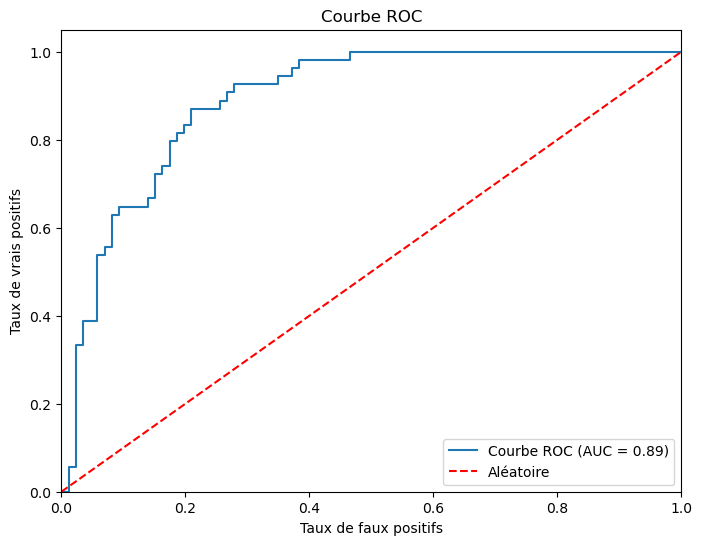

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_XGB, tpr_XGB, label='Courbe ROC (AUC = %0.2f)' % auc_XGB)
plt.plot([0, 1], [0, 1], 'r--', label='Aléatoire')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Créer et entraîner le modèle Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_app, y_app)

# Faire des prédictions sur les données de test
y_pred_gb = gb_model.predict(X_test)

# Générer le rapport de classification
print(classification_report(y_test, y_pred_gb))


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

dans le graphe de la courbe ROC on remarque que la classification est assez bien vu que l'aire sous la courbe vaut 0.89 qui est proche de 1 se qui montre une classification assez efficace mais qui peut etre ammélioré 

### Réseau de Neuronnes

In [195]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_RN = Data[['AGER', 'RELAT', 'MOYRV', 'IMPNBS', 'NTCAS', 'NBCATS','REJETS','ENDET','VIENB','GAGEC']]
y_RN = Data['CARVP']

scaler = StandardScaler()
X_RN = scaler.fit_transform(X_RN)
X_train_RN, X_test_RN, y_train_RN, y_test_RN = train_test_split(X_RN, y_RN, test_size=0.2, random_state=1997)

model2 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=1997)

model2.fit(X_train_RN, y_train_RN)

y_pred_RN = model2.predict(X_test_RN)

accuracy_RN = accuracy_score(y_test_RN, y_pred_RN)
conf_matrix_RN = confusion_matrix(y_test_RN, y_pred_RN)

print("Matrice de confusion (Réseau de Neurones) :\n", conf_matrix_RN)
print("Exactitude du modèle Réseau de Neurones :", accuracy_RN)


Matrice de confusion (Réseau de Neurones) :
 [[68 18]
 [ 7 47]]
Exactitude du modèle Réseau de Neurones : 0.8214285714285714


C:\Users\mezia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
y_proba_RN = model.predict_proba(X_test_RN)[:, 1]
auc_RN = roc_auc_score(y_test_RN, y_proba_RN)
print("AUC du modèle Réseau de Neurones :", auc_RN)

AUC du modèle Réseau de Neurones : 0.8921188630490956


In [196]:
print("Exactitude du modèle de régression logistique :", accuracy_LR)
print("Exactitude du modèle de random forest :", accuracy_RF)
print("Exactitude du modèle de gradient boosting :", accuracy_XGB)
print("Exactitude du modèle de Réseau de neuronne :", accuracy_RN)


Exactitude du modèle de régression logistique : 0.8214285714285714
Exactitude du modèle de random forest : 0.85
Exactitude du modèle de gradient boosting : 0.8071428571428572
Exactitude du modèle de Réseau de neuronne : 0.8214285714285714


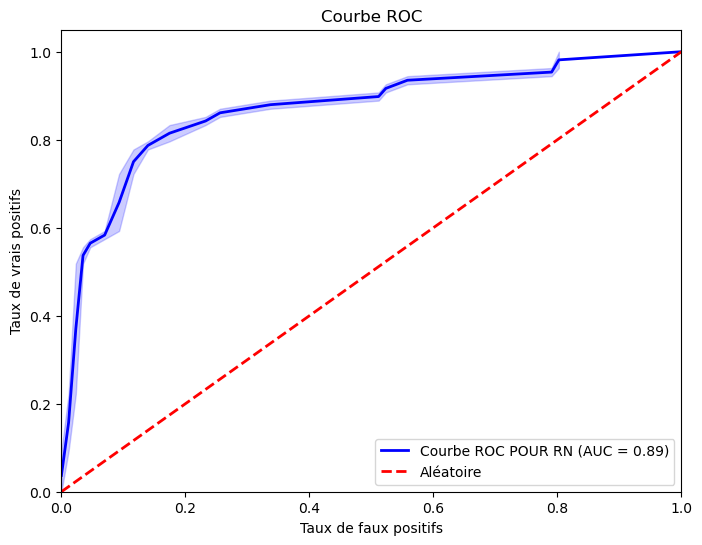

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label='Courbe ROC POUR RN (AUC = %0.2f)' % auc_RN)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Aléatoire')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


On remarque que le meilleur modéle pour le jeux de données est random forest on va maintenant essayer de l'entrainer avec la validation croisée et voir l'amélioration et le taux d'amélioration du modéle 

### Valisation croisée

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5)

scores = cross_val_score(model, X_df, y, cv=5)

print("Scores de validation croisée :", scores)

mean_accuracy = scores.mean()
print("Précision moyenne :", mean_accuracy)